In [2]:
import pandas as pd
from patsy import dmatrices
import matplotlib.pyplot as plt
import math as m
import numpy as np
import seaborn as sns
import statsmodels as sm
import statsmodels.api as sma
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

sns.set(font_scale = 2.5)
plt.rcParams['figure.figsize'] = (12, 9)
#plt.rcParams["text.usetex"] = True

In [3]:
def growth_rate_to_doubling_time(growth_rates):
    return np.sign(growth_rates) * (np.log(2) / (np.sign(growth_rates) * growth_rates))

def doubling_time_to_growth_rate(doubling_times):
    return np.sign(doubling_times) * ( np.log(2) / (np.sign(doubling_times) * doubling_times))

In [4]:
data = pd.read_excel("Data/Simulation Results/growth_rates_with_test_delays_hh_size1_IDP_0.1_0.5_no2step.xlsx", index_col = 0)
days_simulated = 25

In [5]:
infection_counts = [str(i) for i in range(days_simulated)]
infection_counts = data[infection_counts]

In [6]:
infection_counts

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,5000,5011,5249,6070,7625,9898,12657,15818,19283,23397,...,68249,80596,95245,112514,132567,156457,184014,215862,253414,297214
1,5000,5008,5175,5673,6629,7881,9426,10913,12347,13790,...,23153,24826,26483,28194,29840,31556,33216,34807,36479,38141
2,5000,5012,5302,6101,7638,9993,12824,16098,19770,23978,...,71032,84238,99810,117900,138838,163436,191854,225635,264094,309305
3,5000,5014,5252,6003,7493,9565,12254,15124,18197,21659,...,56519,65309,75143,86372,99109,113173,129250,147333,167767,190487
4,5000,5011,5221,5978,7482,9655,12186,15094,18250,21633,...,55594,64024,73569,83947,95495,108424,122875,138858,156817,176477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5000,5001,5126,5502,6199,7153,8170,9158,10100,10838,...,15144,15784,16357,16897,17386,17882,18351,18833,19270,19699
96,5000,5010,5269,6150,7913,10433,13708,17378,21461,26309,...,82782,99134,118545,141222,168437,200219,237936,282024,334113,395390
97,5000,5008,5256,6084,7753,10179,13012,16418,20146,24513,...,72530,86138,102159,120747,142577,167968,197553,232404,273364,320913
98,5000,5002,5114,5449,6035,6830,7706,8546,9264,9840,...,12769,13134,13451,13774,14068,14338,14602,14801,14993,15187


Text(0.5, 1.0, 'Total Infected')

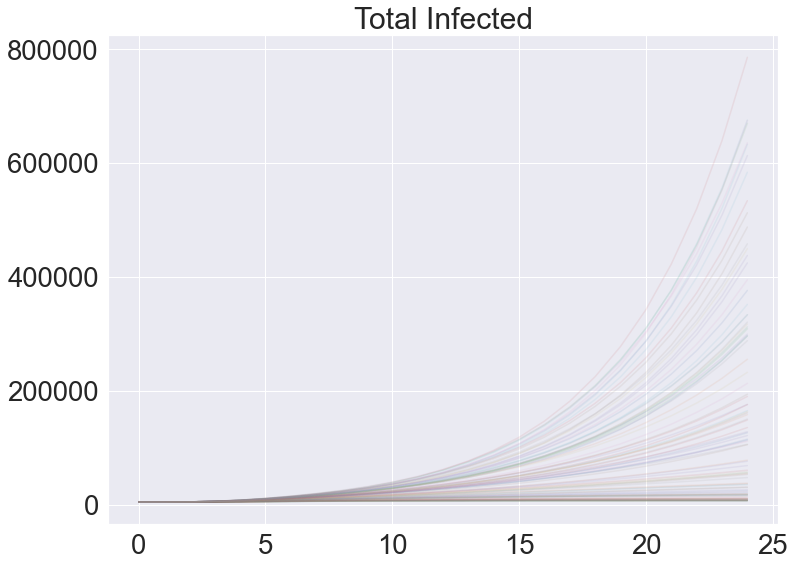

In [7]:
for _ in range(data.shape[0]):
    plt.plot(range(days_simulated), infection_counts.iloc[_], alpha = 0.1)
plt.title("Total Infected")

Text(0.5, 1.0, '$log_2$(Total Infected)')

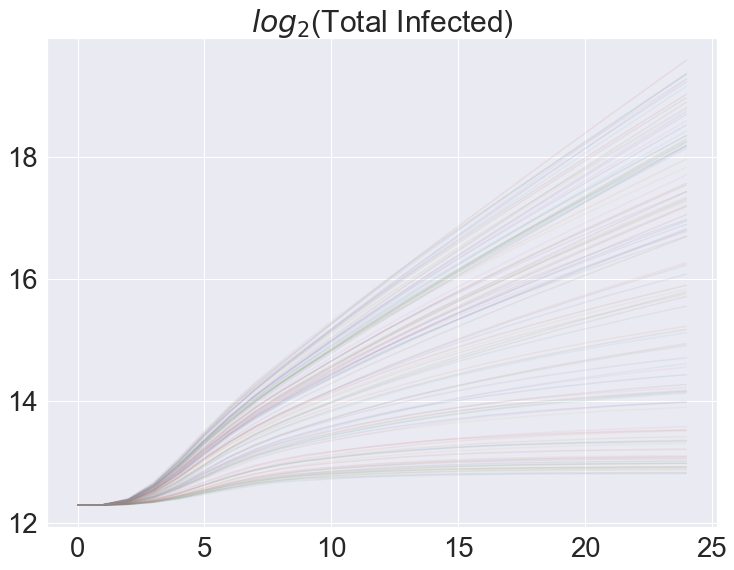

In [8]:
for _ in range(data.shape[0]):
    plt.plot(range(days_simulated), infection_counts.iloc[_].apply(lambda x: np.log2(x)), alpha = 0.1)
plt.title("$log_2$(Total Infected)")

Text(0.5, 1.0, 'Infection Incidence')

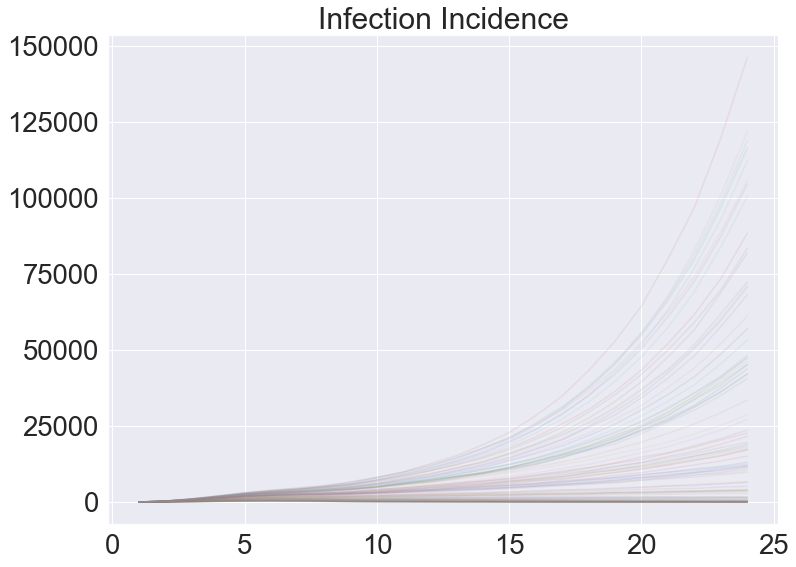

In [9]:
for _ in range(data.shape[0]):
    plt.plot(range(days_simulated), infection_counts.iloc[_].diff(1), alpha = 0.1)
plt.title("Infection Incidence")

Text(0.5, 1.0, 'Infection Incidence (10 epidemics)')

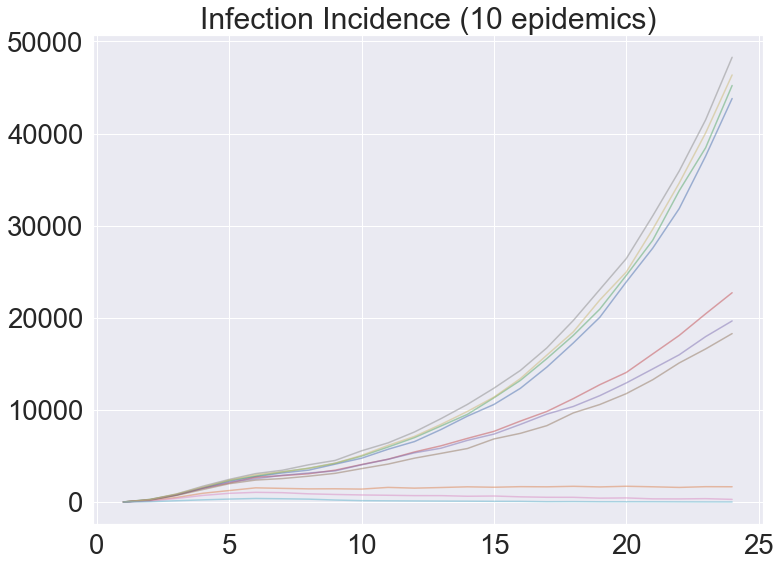

In [10]:
for _ in range(10):
    plt.plot(range(days_simulated), infection_counts.iloc[_].diff(1), alpha = 0.5)
plt.title("Infection Incidence (10 epidemics)")

Text(0.5, 1.0, '$Log_e$(Case Incidence) (14 epidemics)')

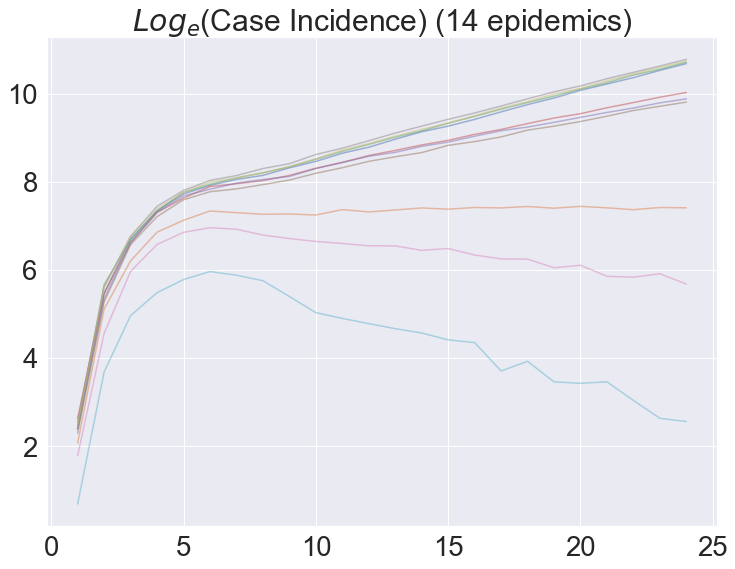

In [11]:
for _ in range(10):
    plt.plot(range(days_simulated), infection_counts.iloc[_].diff(1).apply(lambda x: np.log(x)), alpha = 0.5)
plt.title("$Log_e$(Case Incidence) (14 epidemics)")
#plt.savefig("Figures/Log_case_incidence.png")

We can see the variance begins to increase for the exponentially decaying epidemcis as they near 0. In order to get good estimation for the epidemics, we icnrease the starting number of infections. In this experiment, we start with 5000 infected, let the process run for 10 days, and then estimated the growth rate using days 10-30.

In [12]:
log_diff = infection_counts.iloc[10].diff(1).apply(lambda x: np.log(x))

data_set_up = {
    "log_case_incidence": log_diff[10:days_simulated],
    "time": list(range(10, days_simulated))
}
dataframe = pd.DataFrame(data_set_up)

                            OLS Regression Results                            
Dep. Variable:     log_case_incidence   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     7163.
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           3.27e-19
Time:                        12:46:53   Log-Likelihood:                 38.347
No. Observations:                  15   AIC:                            -72.69
Df Residuals:                      13   BIC:                            -71.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0520      0.021    333.634      0.0

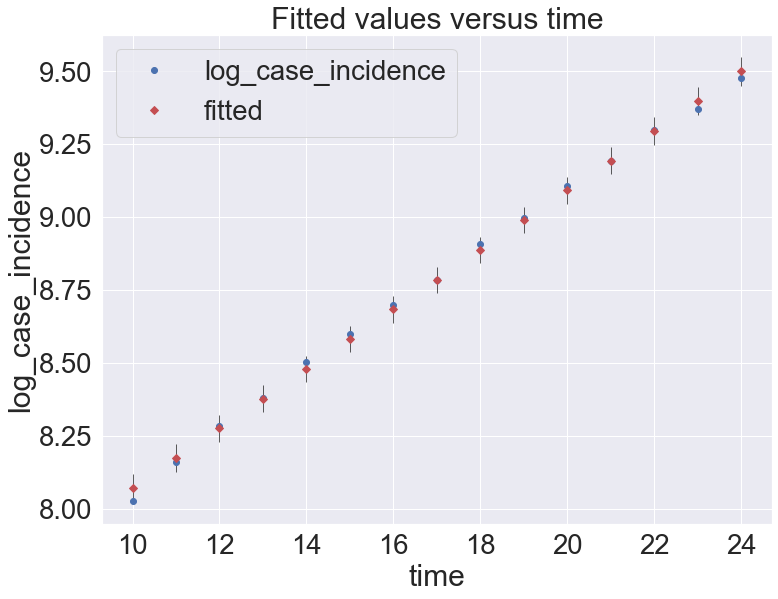

In [13]:
y, X = dmatrices('log_case_incidence ~ time', 
                 data = dataframe)
model = sma.OLS(y, X)
res = model.fit()
print(res.summary())
fig = sm.graphics.regressionplots.plot_fit(res, 1)
print(f"doublign time = {m.log(2)/res.params[1]}")

In [14]:
data_subset = infection_counts

In [15]:
growth_rates = []
for _ in range(data_subset.shape[0]):
    print(f"current fit; {_}", end = "\r")
    
    log_diff = data_subset.iloc[_].diff(1).apply(lambda x: np.log(x))

    data_set_up = {
        "log_case_incidence": log_diff[10:25],
        "time": list(range(10, 25))
    }
    dataframe = pd.DataFrame(data_set_up)
    dataframe = pd.DataFrame(data_set_up)
    
    y, X = dmatrices('log_case_incidence ~ time', 
                     data = dataframe)
    model = sma.RLM(y, X)
    res = model.fit()
    growth_rates.append(res.params[1])

    if res.params[1] == -float("inf"):
        print(f"missing data in line {_}")

In [16]:
x = pd.Series(growth_rates) 
#x = x[x.between(x.quantile(.05), x.quantile(.95))] # without outliers

Text(0.5, 1.0, 'Distribution of Growth Rates')

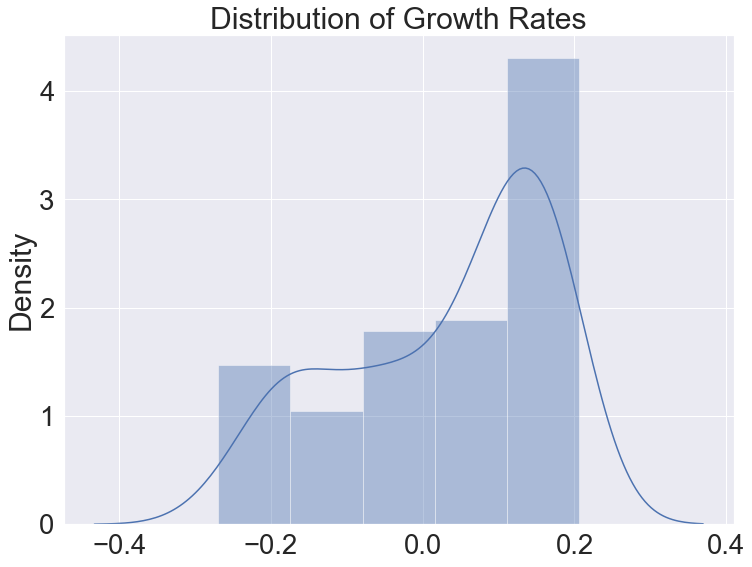

In [17]:
sns.distplot(x)
plt.title("Distribution of Growth Rates")

In [18]:
data_pars = data[data.columns[0:9]]
growth_rate_series = pd.Series(growth_rates)
data_pars["growth_rate"] = growth_rate_series

In [19]:
data_pars

,hazard_rate_scale,infection_reporting_prob,contact_tracing_success_prob,contact_trace_delay_par,global_contact_reduction,two_step_tracing,prob_has_trace_app,test_delay_mean,0,growth_rate
0,0.222252,0.1,0.800269,1.772988,0.223077,False,0.162196,1.773689,5000,0.157735
1,0.240929,0.5,0.827027,1.814683,0.542104,False,0.269743,1.645983,5000,0.006111
2,0.226921,0.2,0.894271,1.733357,0.193455,False,0.355154,1.781198,5000,0.156139
3,0.236259,0.4,0.755270,1.818672,0.262932,False,0.405892,1.468274,5000,0.121660
4,0.231590,0.3,0.937479,1.549656,0.275626,False,0.049235,1.276259,5000,0.111492
...,...,...,...,...,...,...,...,...,...,...
95,0.240929,0.5,0.783852,2.239914,0.660446,False,0.161627,1.451505,5000,-0.046305
96,0.231590,0.3,0.728335,1.763513,0.141315,False,0.057911,1.251818,5000,0.167065
97,0.231590,0.3,0.712778,1.522247,0.193148,False,0.071663,1.883253,5000,0.158293
98,0.240929,0.5,0.797122,1.583197,0.701012,False,0.354434,1.351959,5000,-0.081118


                            OLS Regression Results                            
Dep. Variable:            growth_rate   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     5015.
Date:                Wed, 20 Jan 2021   Prob (F-statistic):          7.20e-118
Time:                        12:47:20   Log-Likelihood:                 374.59
No. Observations:                 100   AIC:                            -727.2
Df Residuals:                      89   BIC:                            -698.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Text(0, 0.5, 'Halving / doubling times (days)')

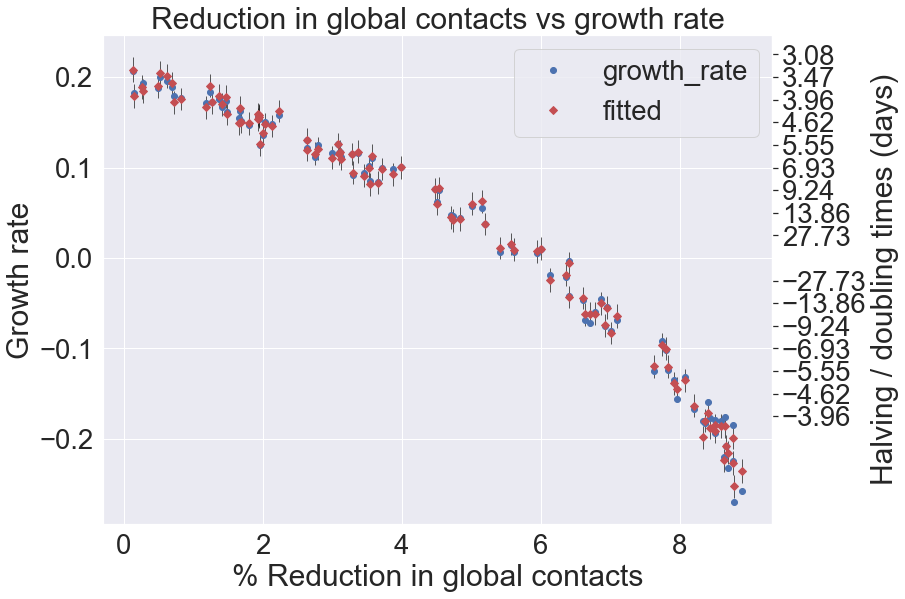

In [59]:
y, X = dmatrices('growth_rate ~ I(global_contact_reduction*10) + I(I(global_contact_reduction*10)**2) + I(I(global_contact_reduction*10)**3) + I(I(global_contact_reduction*10)**4) + I(I(prob_has_trace_app*10)**2) +  I(contact_tracing_success_prob*10) + contact_trace_delay_par +  test_delay_mean + I(infection_reporting_prob*10)', 
                 data = data_pars)
model_2 = sma.OLS(y, X)
#model_2 = sma.RLM(y, X)
res = model_2.fit()
print(res.summary())

fig, ax = plt.subplots()

plot = sm.graphics.regressionplots.plot_fit(res, "I(global_contact_reduction * 10)", ax = ax)

y_vals = np.linspace(-0.175, 0.25, 18)
y_vals = np.concatenate((y_vals[:7], y_vals[8:]))

ax2 = ax.secondary_yaxis("right",
                         functions=(growth_rate_to_doubling_time,
                                    doubling_time_to_growth_rate))
ax2.set_ticks(growth_rate_to_doubling_time(y_vals), minor = False)

plt.xlabel("% Reduction in global contacts")
plt.ylabel("Growth rate")
plt.title("Reduction in global contacts vs growth rate")
ax2.set_ylabel("Halving / doubling times (days)")

In [21]:
res.conf_int(alpha=0.5)

array([[ 2.33120858e-01,  2.46950718e-01],
       [-2.45789133e-02, -1.78938717e-02],
       [-5.53688802e-03, -2.49971189e-03],
       [ 5.02379162e-04,  1.01008973e-03],
       [-8.80396773e-05, -6.01723329e-05],
       [-4.61975646e-04, -3.53924757e-04],
       [-6.05411508e-03, -4.80056748e-03],
       [ 8.59856610e-03,  1.16238692e-02],
       [ 7.91964838e-03,  1.09275634e-02],
       [-8.10906497e-03, -7.47958005e-03]])

<AxesSubplot:xlabel='global_contact_reduction'>

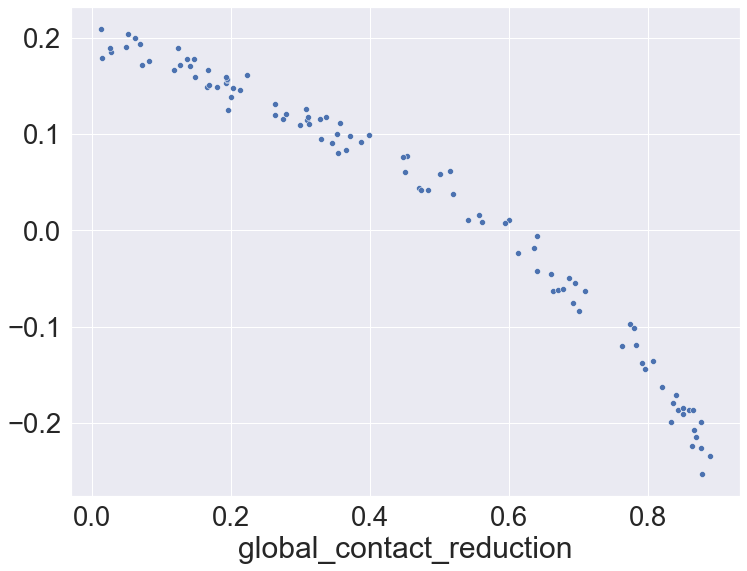

In [22]:
sns.scatterplot(data_pars["global_contact_reduction"], res.fittedvalues)

## Residuals vs Fitted Value

There doesn't appear to be any systematic deviation from our predicted value

Text(0, 0.5, 'Residual')

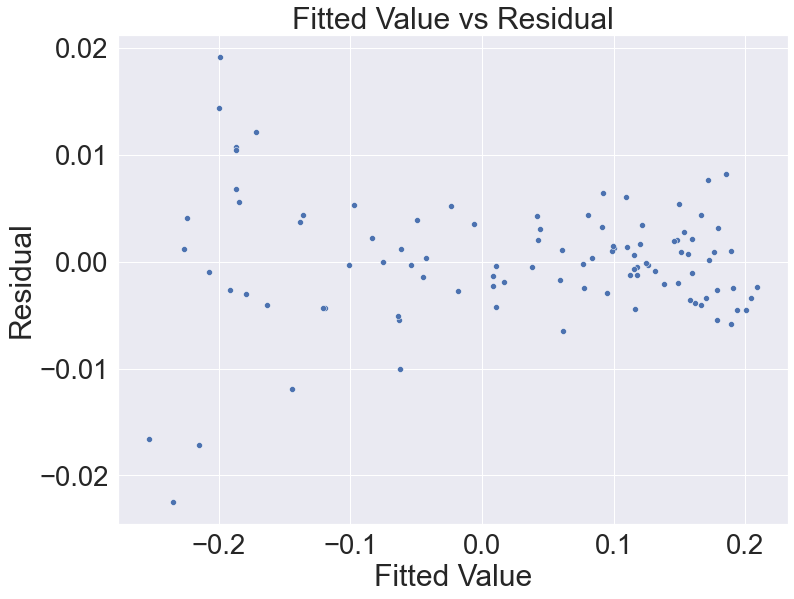

In [23]:
sns.scatterplot(res.fittedvalues, res.resid)
plt.title("Fitted Value vs Residual")
plt.xlabel("Fitted Value")
plt.ylabel("Residual")

#plt.savefig("../../Figures/Simulation - test delay/res_fittedvalues_hh_gcr**4.pdf", bbox_inches = 'tight')

## Residual Distribution

Text(0.5, 1.0, 'Distribution of the residuals')

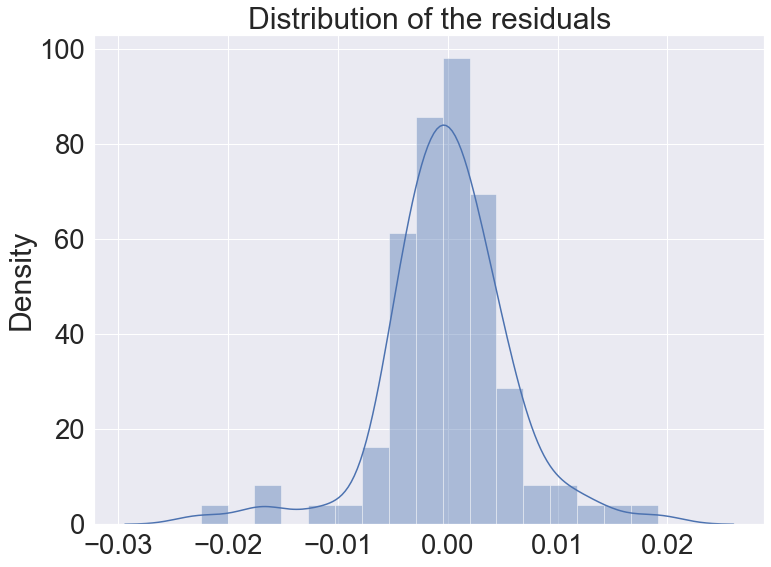

In [24]:
sns.distplot(res.resid)
plt.title("Distribution of the residuals")

Sort of normally distributed

## Comparison to reference distributions

In [25]:
reference_coefs = pd.read_excel("Data/Reference/OLS_coefficients_IDP_0.1_0.5_hhsize1.xlsx", index_col = 0)
reference_coefs

,intercept,coef_contact_reduction,coef_contact_reduction**2,coef_contact_reduction**3,coef_contact_reduction**4
0,0.219025,-0.179784,-0.523144,0.980479,-0.876667


In [26]:
c = reference_coefs["intercept"].loc[0]
beta_0 = reference_coefs["coef_contact_reduction"].loc[0]
beta_1 = reference_coefs["coef_contact_reduction**2"].loc[0]
beta_2 = reference_coefs["coef_contact_reduction**3"].loc[0]
beta_3 = reference_coefs["coef_contact_reduction**4"].loc[0]
x = np.linspace(0, 0.9)
y = c + beta_0*x + beta_1*x**2 + beta_2*x**3 + beta_3*x**4

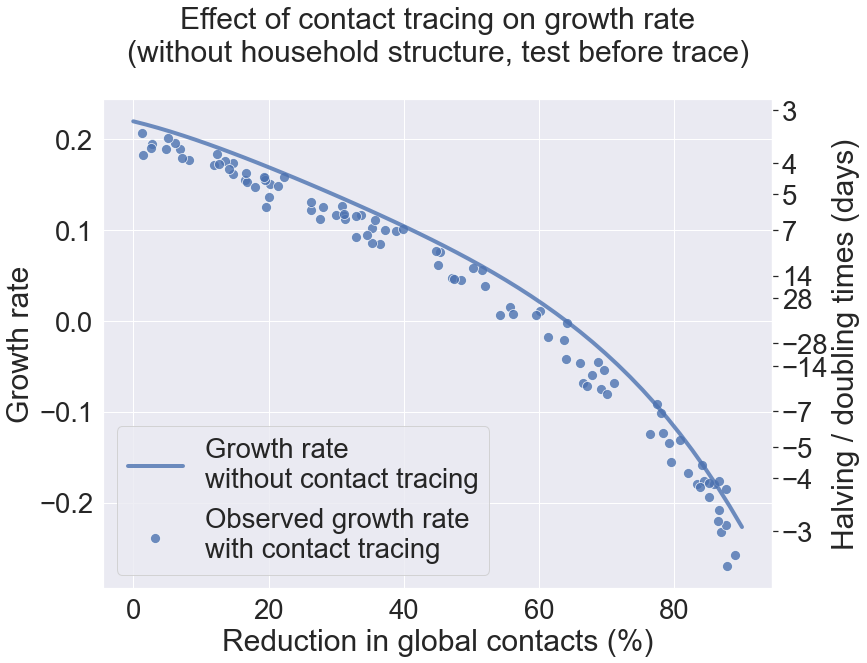

In [27]:

fig, ax = plt.subplots()

sns.scatterplot(data_pars["global_contact_reduction"] * 100, data_pars["growth_rate"], s = 100, alpha = 0.8)
plt.plot(x * 100, y, linewidth = 4, alpha = 0.8)

#y_vals = np.linspace(-0.225, 0.25, 20)
#y_vals = np.concatenate((y_vals[:9], y_vals[10:]))

y_vals = [doubling_time_to_growth_rate(x) for x in [-3, -4, -5, -7, -14, -28, 28, 14, 7, 5, 4, 3]]

ax2 = ax.secondary_yaxis("right",
                         functions=(growth_rate_to_doubling_time,
                                    doubling_time_to_growth_rate))
ax2.set_ticks(growth_rate_to_doubling_time(y_vals), minor = False)

plt.legend(("Growth rate\nwithout contact tracing", "Observed growth rate\nwith contact tracing"))
plt.title("Effect of contact tracing on growth rate\n(without household structure, test before trace)\n")
plt.ylabel("Growth rate")
plt.xlabel("Reduction in global contacts (%)")
ax2.set_ylabel("Halving / doubling times (days)")
plt.savefig("Figures/Simulation - test delay/growth_rate_comparison_IDP0.1_0.5_hhsize1.svg", bbox_inches = 'tight')
plt.savefig("Figures/Simulation - test delay/growth_rate_comparison_IDP0.1_0.5_hhsize1.png", bbox_inches = 'tight')
plt.savefig("Figures/Simulation - test delay/growth_rate_comparison_IDP0.1_0.5_hhsize1.pdf", bbox_inches = 'tight')

In [28]:
# Now looking at epidemics with household structure
data_hh = pd.read_excel("Data/Simulation Results/growth rates with test delays_IDP_0.1_0.5_no2step.xlsx")


In [29]:
infection_counts = [str(i) for i in range(days_simulated)]
infection_counts_hh = data_hh[infection_counts]

In [30]:
log_diff = infection_counts_hh.iloc[_].diff(1).apply(lambda x: np.log(x))

data_set_up = {
    "log_case_incidence": log_diff[10:days_simulated],
    "time": list(range(10, days_simulated))
}
dataframe_hh = pd.DataFrame(data_set_up)

                            OLS Regression Results                            
Dep. Variable:     log_case_incidence   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     3082.
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           7.74e-17
Time:                        12:47:00   Log-Likelihood:                 31.975
No. Observations:                  15   AIC:                            -59.95
Df Residuals:                      13   BIC:                            -58.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.2390      0.032    223.944      0.0

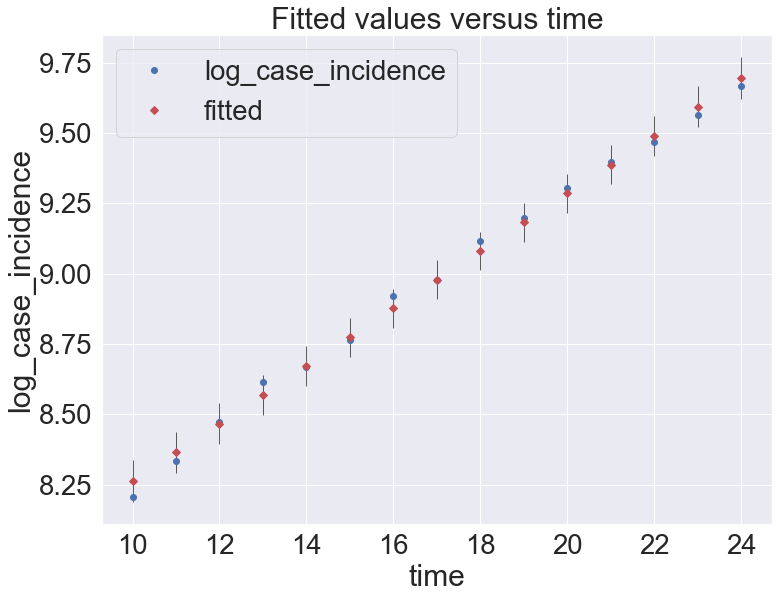

In [31]:
y, X = dmatrices('log_case_incidence ~ time', 
                 data = dataframe_hh)
model_hh = sma.OLS(y, X)
res_hh = model_hh.fit()
print(res_hh.summary())
fig = sm.graphics.regressionplots.plot_fit(res_hh, 1)
print(f"doublign time = {m.log(2)/res_hh.params[1]}")

In [32]:
data_subset_hh = infection_counts_hh

In [33]:
growth_rates_hh = []
for _ in range(data_subset_hh.shape[0]):
    print(f"current fit; {_}", end = "\r")
    
    log_diff = data_subset_hh.iloc[_].diff(1).apply(lambda x: np.log(x))

    data_set_up = {
        "log_case_incidence": log_diff[10:25],
        "time": list(range(10, 25))
    }
    dataframe_hh = pd.DataFrame(data_set_up)
    dataframe_hh = pd.DataFrame(data_set_up)
    
    y, X = dmatrices('log_case_incidence ~ time', 
                     data = dataframe_hh)
    model_hh = sma.RLM(y, X)
    res_hh = model_hh.fit()
    growth_rates_hh.append(res_hh.params[1])

    if res_hh.params[1] == -float("inf"):
        print(f"missing data in line {_}")

In [34]:
x_hh = pd.Series(growth_rates_hh) 

In [35]:
data_pars_hh = data_hh[data.columns[0:9]]
growth_rate_series_hh = pd.Series(growth_rates_hh)
data_pars_hh["growth_rate"] = growth_rate_series_hh

In [36]:
data_pars_hh

,hazard_rate_scale,infection_reporting_prob,contact_tracing_success_prob,contact_trace_delay_par,global_contact_reduction,two_step_tracing,prob_has_trace_app,test_delay_mean,0,growth_rate
0,0.237670,0.3,0.750860,1.701871,0.473694,False,0.190432,1.475925,5000,0.064611
1,0.244234,0.4,0.740404,2.075902,0.175829,False,0.375055,1.734967,5000,0.149985
2,0.231106,0.2,0.773174,2.054055,0.772144,False,0.449298,1.859720,5000,-0.048628
3,0.237670,0.3,0.816106,1.937490,0.177212,False,0.148583,1.658083,5000,0.153198
4,0.237670,0.3,0.901041,1.805184,0.890666,False,0.123559,1.952255,5000,-0.157346
...,...,...,...,...,...,...,...,...,...,...
95,0.224541,0.1,0.752915,2.272385,0.521630,False,0.239044,1.641586,5000,0.071822
96,0.250799,0.5,0.741704,1.617122,0.324487,False,0.096803,1.619224,5000,0.100310
97,0.224541,0.1,0.774781,2.329165,0.006972,False,0.365655,1.688509,5000,0.210462
98,0.244234,0.4,0.917416,1.984268,0.691229,False,0.088218,1.405419,5000,-0.043691


                            OLS Regression Results                            
Dep. Variable:            growth_rate   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     3498.
Date:                Wed, 20 Jan 2021   Prob (F-statistic):          6.33e-111
Time:                        12:47:02   Log-Likelihood:                 390.12
No. Observations:                 100   AIC:                            -758.2
Df Residuals:                      89   BIC:                            -729.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Text(0, 0.5, 'Halving / doubling times (days)')

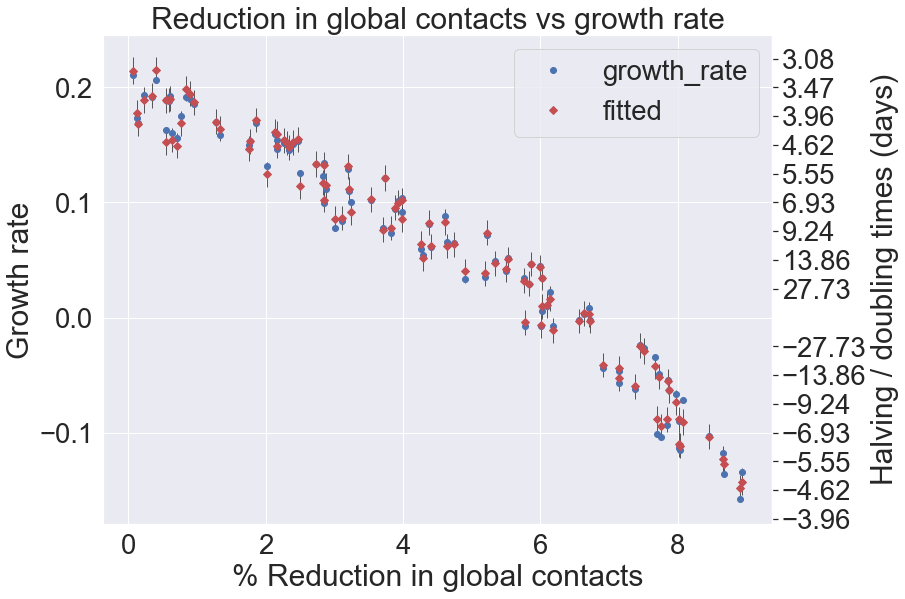

In [37]:
y2, X = dmatrices('growth_rate ~ I(global_contact_reduction*10) + I(I(global_contact_reduction*10)**2) + I(I(global_contact_reduction*10)**3)+ I(I(global_contact_reduction*10)**4) + I(I(prob_has_trace_app*10)**2) +  I(contact_tracing_success_prob*10) + contact_trace_delay_par + contact_trace_delay_par + test_delay_mean + I(infection_reporting_prob*10)', data = data_pars_hh)
model_2_hh = sma.OLS(y2, X)
res_hh = model_2_hh.fit()
print(res_hh.summary())

fig, ax = plt.subplots()

plot = sm.graphics.regressionplots.plot_fit(res_hh, "I(global_contact_reduction * 10)", ax = ax)

y_vals = np.linspace(-0.175, 0.25, 18)
y_vals = np.concatenate((y_vals[:7], y_vals[8:]))

ax2 = ax.secondary_yaxis("right",
                         functions=(growth_rate_to_doubling_time,
                                    doubling_time_to_growth_rate))
ax2.set_ticks(growth_rate_to_doubling_time(y_vals), minor = False)

plt.xlabel("% Reduction in global contacts")
plt.ylabel("Growth rate")
plt.title("Reduction in global contacts vs growth rate")
ax2.set_ylabel("Halving / doubling times (days)")

<AxesSubplot:xlabel='global_contact_reduction'>

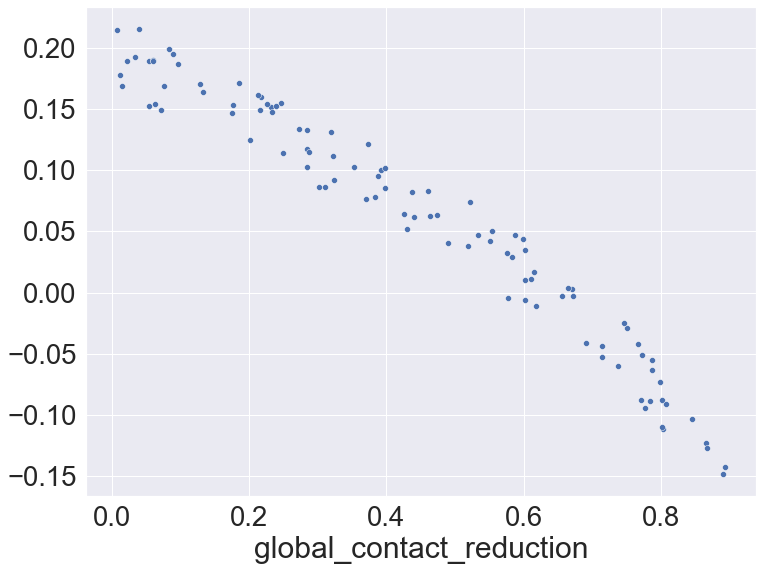

In [38]:
sns.scatterplot(data_pars_hh["global_contact_reduction"], res_hh.fittedvalues)

Text(0.5, 1.0, 'Distribution of the residuals')

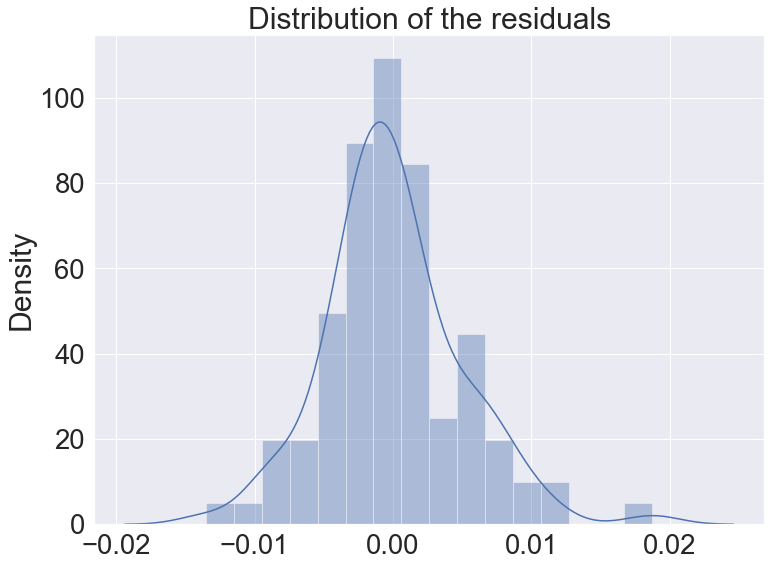

In [39]:
sns.distplot(res_hh.resid)
plt.title("Distribution of the residuals")

In [40]:
#These coefficients from the reference data.ipynb rile on the master branch, using only the IDP 0.15, 0.2, 0.25 simulations
reference_coefs_hh = pd.read_excel("Data/Reference/OLS_coefficients.xlsx", index_col = 0)
reference_coefs_hh

,intercept,coef_contact_reduction,coef_contact_reduction**2,coef_contact_reduction**3,coef_contact_reduction**4
0,0.219887,-0.185921,-0.260727,0.422797,-0.414373


In [41]:
c = reference_coefs_hh["intercept"].loc[0]
beta_0 = reference_coefs_hh["coef_contact_reduction"].loc[0]
beta_1 = reference_coefs_hh["coef_contact_reduction**2"].loc[0]
beta_2 = reference_coefs_hh["coef_contact_reduction**3"].loc[0]
beta_3 = reference_coefs_hh["coef_contact_reduction**4"].loc[0]
x = np.linspace(0, 0.9)
y = c + beta_0*x + beta_1*x**2 + beta_2*x**3 + beta_3*x**4

In [42]:
data_pars_hh['growth_rate']

0     0.064611
1     0.149985
2    -0.048628
3     0.153198
4    -0.157346
        ...   
95    0.071822
96    0.100310
97    0.210462
98   -0.043691
99    0.101933
Name: growth_rate, Length: 100, dtype: float64

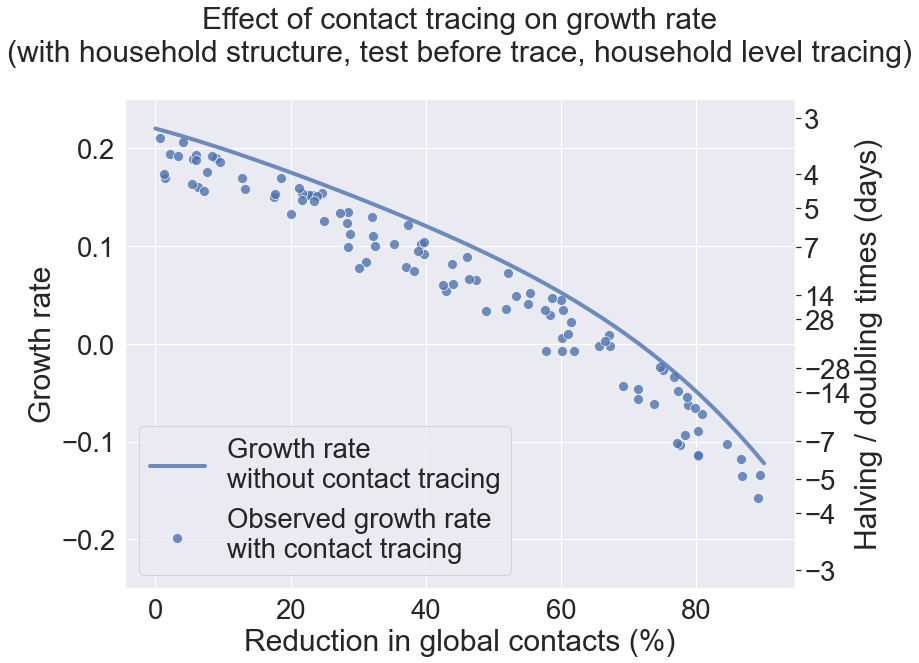

In [43]:
fig, ax = plt.subplots()

sns.scatterplot(data_pars_hh["global_contact_reduction"] * 100, data_pars_hh['growth_rate'], s = 100, alpha = 0.8)
plt.ylim(-0.25, 0.25) # Make consistent with plot without HH structure
plt.plot(x * 100, y, linewidth = 4, alpha = 0.8)

#y_vals = np.linspace(-0.225, 0.25, 20)
#y_vals = np.concatenate((y_vals[:9], y_vals[10:]))

y_vals = [doubling_time_to_growth_rate(x) for x in [-3, -4, -5, -7, -14, -28, 28, 14, 7, 5, 4, 3]]

ax2 = ax.secondary_yaxis("right",
                         functions=(growth_rate_to_doubling_time,
                                    doubling_time_to_growth_rate))
ax2.set_ticks(growth_rate_to_doubling_time(y_vals), minor = False)


plt.legend(("Growth rate\nwithout contact tracing", "Observed growth rate\nwith contact tracing"))
plt.title("With household structure: observed growth rate with comparison curve,\n household-based tracing initiated on testing")
plt.title("Effect of contact tracing on growth rate\n(with household structure, test before trace, household level tracing)\n")
plt.ylabel("Growth rate")
plt.xlabel("Reduction in global contacts (%)")

ax2.set_ylabel("Halving / doubling times (days)")
plt.savefig("Figures/Simulation - test delay/growth_rate_comparison_hh.jpg", bbox_inches = 'tight')
plt.savefig("Figures/Simulation - test delay/growth_rate_comparison_hh.png", bbox_inches = 'tight')
plt.savefig("Figures/Simulation - test delay/growth_rate_comparison_hh.pdf", bbox_inches = 'tight')

In [44]:
## Now look at epidemics where there is household structure but tracing is done on an individual basis (quarantine and no tracing of whole household's contacts)

data_hh_ind = pd.read_excel("Data/Simulation Results/growth rates with test delays_IDP_0.1_0.5_uk_model_no2step.xlsx", index_col = 0)
#data_hh_ind = pd.read_excel("/Users/LizFearon/Desktop/growth rates with test delays_IDP_0.15_0.25_uk_model_missing2stepinfo.xlsx", index_col = 0)

days_simulated = 25

In [45]:
data_hh_ind

,hazard_rate_scale,infection_reporting_prob,contact_tracing_success_prob,contact_trace_delay_par,global_contact_reduction,two_step_tracing,prob_has_trace_app,test_delay_mean,0,1,...,15,16,17,18,19,20,21,22,23,24
0,0.237670,0.3,0.706413,2.380223,0.150023,False,0.313239,1.129558,5000,5012,...,87879,105628,126718,151847,181632,217233,259249,309473,369388,440276
1,0.231106,0.2,0.796934,2.374772,0.701116,False,0.415550,1.152378,5000,5006,...,18436,19484,20524,21581,22605,23623,24642,25661,26630,27586
2,0.224541,0.1,0.838154,2.045452,0.149093,False,0.245602,1.159362,5000,5016,...,89223,108074,130377,157169,189473,227957,274258,329934,396656,476324
3,0.250799,0.5,0.808371,2.481147,0.616974,False,0.262077,1.097383,5000,5013,...,23630,25234,26805,28429,30013,31684,33312,34966,36628,38251
4,0.231106,0.2,0.867649,1.527262,0.702329,False,0.391104,1.579919,5000,5007,...,18430,19491,20522,21568,22536,23520,24556,25495,26484,27406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.224541,0.1,0.755544,1.590095,0.801927,False,0.389522,1.573806,5000,5003,...,13393,13856,14304,14748,15174,15551,15956,16300,16632,16950
96,0.224541,0.1,0.800406,1.907136,0.792778,False,0.458156,1.208214,5000,5002,...,13943,14462,14980,15450,15896,16341,16782,17192,17581,17953
97,0.237670,0.3,0.892092,1.833919,0.517585,False,0.497716,1.157968,5000,5007,...,32452,35692,39081,42686,46518,50561,54862,59343,64012,69025
98,0.231106,0.2,0.831194,1.724863,0.142737,False,0.045475,1.950697,5000,5016,...,92243,111217,134332,161887,194827,234397,281000,337609,404844,485003


In [46]:
infection_counts= [str(i) for i in range(days_simulated)]
infection_counts_hh_ind = data_hh_ind[infection_counts]

In [47]:
infection_counts_hh_ind 

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,5000,5012,5304,6257,8007,10551,13890,17658,22100,27207,...,87879,105628,126718,151847,181632,217233,259249,309473,369388,440276
1,5000,5006,5144,5570,6356,7402,8584,9802,10986,12047,...,18436,19484,20524,21581,22605,23623,24642,25661,26630,27586
2,5000,5016,5301,6233,8030,10529,13751,17426,21776,26809,...,89223,108074,130377,157169,189473,227957,274258,329934,396656,476324
3,5000,5013,5162,5684,6657,7977,9574,11181,12708,14186,...,23630,25234,26805,28429,30013,31684,33312,34966,36628,38251
4,5000,5007,5130,5541,6325,7399,8621,9815,10954,12008,...,18430,19491,20522,21568,22536,23520,24556,25495,26484,27406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5000,5003,5103,5447,6054,6810,7730,8582,9334,9941,...,13393,13856,14304,14748,15174,15551,15956,16300,16632,16950
96,5000,5002,5113,5444,6029,6856,7755,8663,9480,10193,...,13943,14462,14980,15450,15896,16341,16782,17192,17581,17953
97,5000,5007,5185,5793,6941,8609,10533,12467,14539,16562,...,32452,35692,39081,42686,46518,50561,54862,59343,64012,69025
98,5000,5016,5318,6199,7995,10631,13973,17917,22410,27551,...,92243,111217,134332,161887,194827,234397,281000,337609,404844,485003


In [48]:
log_diff = infection_counts_hh_ind.iloc[_].diff(1).apply(lambda x: np.log(x))

data_set_up = {
    "log_case_incidence": log_diff[10:days_simulated],
    "time": list(range(10, days_simulated))
}
dataframe_hh_ind = pd.DataFrame(data_set_up)

In [49]:
dataframe_hh_ind

,log_case_incidence,time
10,6.255750,10
11,6.188264,11
12,6.131226,12
13,5.874931,13
14,5.869297,14
15,5.723585,15
16,5.693732,16
17,5.556828,17
18,5.438079,18
19,5.278115,19


                            OLS Regression Results                            
Dep. Variable:     log_case_incidence   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1057.
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           7.74e-14
Time:                        12:47:07   Log-Likelihood:                 24.343
No. Observations:                  15   AIC:                            -44.69
Df Residuals:                      13   BIC:                            -43.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.2533      0.054    134.907      0.0

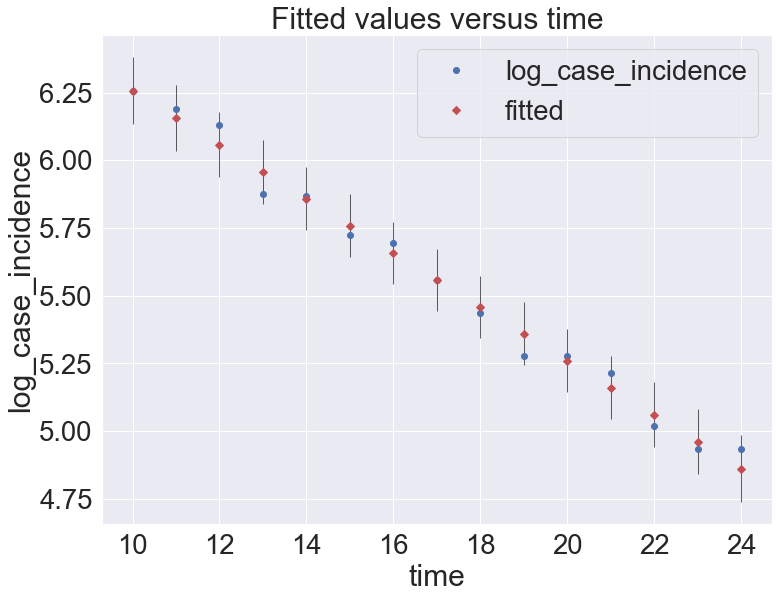

In [50]:
y, X = dmatrices('log_case_incidence ~ time', 
                 data = dataframe_hh_ind)
model_hh_ind = sma.OLS(y, X)
res_hh_ind = model_hh_ind.fit()
print(res_hh_ind.summary())
fig = sm.graphics.regressionplots.plot_fit(res_hh_ind, 1)
print(f"doublign time = {m.log(2)/res_hh_ind.params[1]}")

In [51]:
data_subset_hh_ind = infection_counts_hh_ind

In [52]:
growth_rates_hh_ind = []
for _ in range(data_subset_hh_ind.shape[0]):
    print(f"current fit; {_}", end = "\r")
    
    log_diff = data_subset_hh_ind.iloc[_].diff(1).apply(lambda x: np.log(x))

    data_set_up = {
        "log_case_incidence": log_diff[10:25],
        "time": list(range(10, 25))
    }
    dataframe_hh_ind = pd.DataFrame(data_set_up)
    dataframe_hh_ind = pd.DataFrame(data_set_up)
    
    y, X = dmatrices('log_case_incidence ~ time', 
                     data = dataframe_hh_ind)
    model_hh_ind = sma.RLM(y, X)
    res_hh_ind = model_hh_ind.fit()
    growth_rates_hh_ind.append(res_hh_ind.params[1])

    if res_hh_ind.params[1] == -float("inf"):
        print(f"missing data in line {_}")

In [53]:
x_hh_ind = pd.Series(growth_rates_hh_ind) 

In [54]:
data_pars_hh_ind = data_hh_ind[data_hh_ind.columns[0:9]]
growth_rate_series_hh_ind = pd.Series(growth_rates_hh_ind)
data_pars_hh_ind["growth_rate"] = growth_rate_series_hh_ind

                            OLS Regression Results                            
Dep. Variable:            growth_rate   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4594.
Date:                Wed, 20 Jan 2021   Prob (F-statistic):          3.53e-116
Time:                        12:47:08   Log-Likelihood:                 398.60
No. Observations:                 100   AIC:                            -775.2
Df Residuals:                      89   BIC:                            -746.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Text(0, 0.5, 'Halving / doubling times (days)')

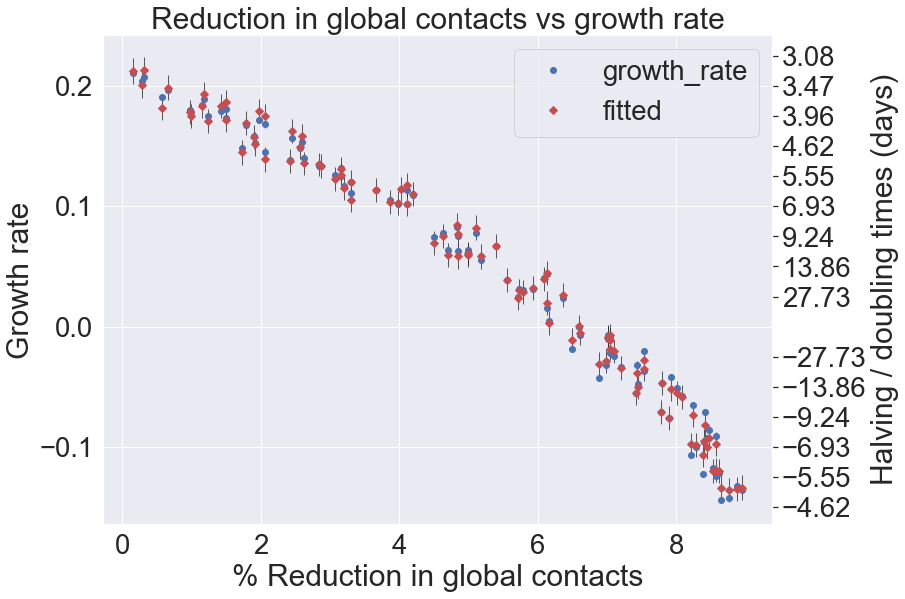

In [55]:
y2, X = dmatrices('growth_rate ~ I(global_contact_reduction*10) + I(I(global_contact_reduction*10)**2) + I(I(global_contact_reduction*10)**3)+ I(I(global_contact_reduction*10)**4) + I(I(prob_has_trace_app*10)**2) +  I(contact_tracing_success_prob*10) + contact_trace_delay_par + test_delay_mean + I(infection_reporting_prob*10)', data = data_pars_hh_ind)
model_2_hh_ind = sma.OLS(y2, X)
res_hh_ind = model_2_hh_ind.fit()
print(res_hh_ind.summary())

fig, ax = plt.subplots()

plot = sm.graphics.regressionplots.plot_fit(res_hh_ind, "I(global_contact_reduction * 10)", ax = ax)

y_vals = np.linspace(-0.175, 0.25, 18)
y_vals = np.concatenate((y_vals[:7], y_vals[8:]))

ax2 = ax.secondary_yaxis("right",
                         functions=(growth_rate_to_doubling_time,
                                    doubling_time_to_growth_rate))
ax2.set_ticks(growth_rate_to_doubling_time(y_vals), minor = False)

plt.xlabel("% Reduction in global contacts")
plt.ylabel("Growth rate")
plt.title("Reduction in global contacts vs growth rate")
ax2.set_ylabel("Halving / doubling times (days)")

In [56]:
#These coefficients from the reference data.ipynb rile on the master branch
#reference_coefs_hh = pd.read_excel("../../Data/Reference/OLS_coefficients_IDP_0.15_0.25.xlsx", index_col = 0)

# Same reference curve as above, for household structure
reference_coefs_hh

,intercept,coef_contact_reduction,coef_contact_reduction**2,coef_contact_reduction**3,coef_contact_reduction**4
0,0.219887,-0.185921,-0.260727,0.422797,-0.414373


In [57]:
# same reference curve as wit the fully household based tracing above because the difference is in tracing and the reference curve is isolaiton of case and household members only)
c = reference_coefs_hh["intercept"].loc[0]
beta_0 = reference_coefs_hh["coef_contact_reduction"].loc[0]
beta_1 = reference_coefs_hh["coef_contact_reduction**2"].loc[0]
beta_2 = reference_coefs_hh["coef_contact_reduction**3"].loc[0]
beta_3 = reference_coefs_hh["coef_contact_reduction**4"].loc[0]
x = np.linspace(0, 0.9)
y = c + beta_0*x + beta_1*x**2 + beta_2*x**3 + beta_3*x**4

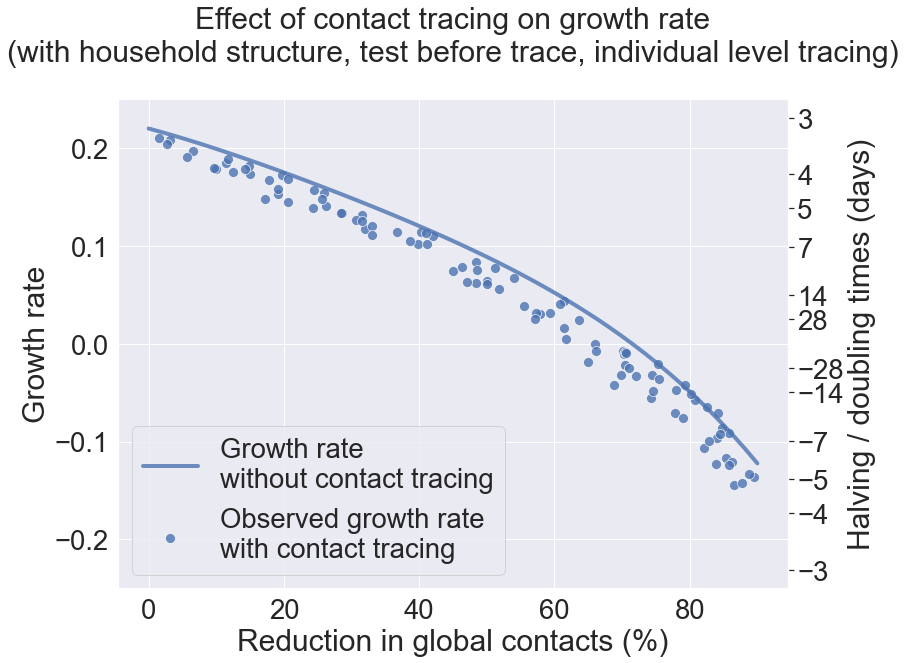

In [58]:
fig, ax = plt.subplots()

sns.scatterplot(data_pars_hh_ind["global_contact_reduction"] * 100, data_pars_hh_ind['growth_rate'], s = 100, alpha = 0.8)
plt.ylim(-0.25, 0.25) # Make consistent with plot without HH structure
plt.plot(x * 100, y, linewidth = 4, alpha = 0.8)

#y_vals = np.linspace(-0.225, 0.25, 20)
#y_vals = np.concatenate((y_vals[:9], y_vals[10:]))

y_vals = [doubling_time_to_growth_rate(x) for x in [-3, -4, -5, -7, -14, -28, 28, 14, 7, 5, 4, 3]]

ax2 = ax.secondary_yaxis("right",
                         functions=(growth_rate_to_doubling_time,
                                    doubling_time_to_growth_rate))
ax2.set_ticks(growth_rate_to_doubling_time(y_vals), minor = False)

plt.legend(("Growth rate\nwithout contact tracing", "Observed growth rate\nwith contact tracing"))
plt.title("Effect of contact tracing on growth rate\n(with household structure, test before trace, individual level tracing)\n")
plt.ylabel("Growth rate")
plt.xlabel("Reduction in global contacts (%)")
ax2.set_ylabel("Halving / doubling times (days)")
plt.savefig("Figures/Simulation - test delay/growth_rate_comparison_hh_ind.svg", bbox_inches = 'tight')
plt.savefig("Figures/Simulation - test delay/growth_rate_comparison_hh_ind.png", bbox_inches = 'tight')
plt.savefig("Figures/Simulation - test delay/growth_rate_comparison_hh_ind.pdf", bbox_inches = 'tight')